In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/drive/MyDrive/archive.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/train_test/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [6]:
filenames = os.listdir('/content/train_test/train/train')

In [7]:
type(filenames)

list

In [9]:
len(filenames)

50000

In [8]:
print(filenames[0:5])
print(filenames[-5:])

['22167.png', '507.png', '24613.png', '19986.png', '28794.png']
['12016.png', '27424.png', '47624.png', '43641.png', '4060.png']


In [10]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [11]:
labels_df.shape

(50000, 2)

In [12]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [13]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [14]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


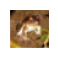

In [15]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/train_test/train/train/1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display

plt.figure(figsize=(0.50, 0.50))
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

In [16]:
id_list = list(labels_df['id'])

In [17]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [18]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [19]:
type(data)

list

In [20]:
len(data)

50000

In [21]:
type(data[0])

numpy.ndarray

In [22]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

<h4 style="color:purple">Load the dataset</h4>

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [25]:
Y_train.shape

(40000,)

In [26]:
Y_train[:5]

array([3, 8, 8, 2, 1])

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [27]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([3, 8, 8, 2, 1])

In [28]:
Y_test = Y_test.reshape(-1,)

Let's plot some images to see what they are

In [29]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(labels[Y[index]])

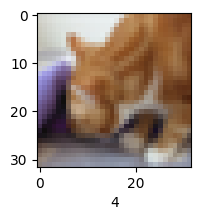

In [30]:
plot_sample(X_train, Y_train, 0)

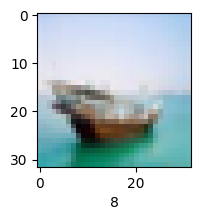

In [31]:
plot_sample(X_train, Y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [32]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [58]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Data Augmentation to improve generalization
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255
)

# Improved CNN Model
cnn = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(10, activation='softmax')
])

# Compile model with improved settings
cnn.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the improved model
cnn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3772 - loss: 1.7074
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5973 - loss: 1.1514
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6503 - loss: 0.9937
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7003 - loss: 0.8610
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7305 - loss: 0.7696
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7577 - loss: 0.6889
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7838 - loss: 0.6171
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8109 - loss: 0.5332
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8381 - loss: 0.4767
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8566 - loss: 0.4213


In [63]:
cnn.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8734 - loss: 0.3641 - val_accuracy: 0.6730 - val_loss: 1.1835
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8932 - loss: 0.3116 - val_accuracy: 0.6749 - val_loss: 1.2119
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9110 - loss: 0.2598 - val_accuracy: 0.6764 - val_loss: 1.2962
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9224 - loss: 0.2238 - val_accuracy: 0.6814 - val_loss: 1.3939
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9354 - loss: 0.1902 - val_accuracy: 0.6620 - val_loss: 1.5062
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9486 - loss: 0.1563 - val_accuracy: 0.6697 - val_loss: 1.6558
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9550 - loss: 0.1364 - val_accuracy: 0.6687 - val_loss: 1.7671
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9536 - loss: 0.1341 -

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [64]:
cnn.evaluate(X_train,Y_train)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9638 - loss: 0.1039


[0.10191315412521362, 0.9644500017166138]

In [65]:
cnn.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6590 - loss: 2.2221


[2.1754024028778076, 0.6614000201225281]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


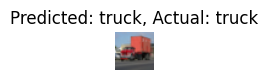


✅ Model Prediction: truck


In [71]:
import numpy as np
import matplotlib.pyplot as plt

def predict_image(index):
    img = X_test[index]  # Select an image from test data
    img_reshaped = img.reshape(1, 32, 32, 3)  # Reshape for model input

    prediction = cnn.predict(img_reshaped)
    predicted_class = np.argmax(prediction)

    # Get the actual class label from the Y_test data
    actual_class = Y_test[index]

    # Get the class name using labels_dictionary in reverse
    labels_dictionary_reversed = {v: k for k, v in labels_dictionary.items()}
    predicted_class_name = labels_dictionary_reversed[predicted_class]
    actual_class_name = labels_dictionary_reversed[actual_class]

    # Set the figure size to (0.5, 0.5)
    plt.figure(figsize=(0.5, 0.5))

    # Display the image with the predicted and actual labels
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_name}, Actual: {actual_class_name}")
    plt.axis("off")
    plt.show()

    print(f"\n✅ Model Prediction: {predicted_class_name}")

# Predict and display an image
predict_image(500)

In [72]:
cnn.save("model.h5")  # Save model in HDF5 format
from google.colab import files
files.download("model.h5")  # Download model to your local system

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>